<a href="https://colab.research.google.com/github/Archonz-crazy/GoogleStock/blob/master/GoogleStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import warnings
import fbprophet

In [4]:
data = pd.read_csv("GOOG.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-11-17,84.194420,88.418587,84.184456,85.927917,85.927917,36401733
1,2004-11-18,84.827049,86.884338,82.555557,83.457184,83.457184,33383864
2,2004-11-19,84.234268,84.672623,82.949089,84.383713,84.383713,17604339
3,2004-11-22,81.927917,84.433525,80.353813,82.241737,82.241737,24829118
4,2004-11-23,83.671379,85.096039,82.939125,83.447220,83.447220,24919656


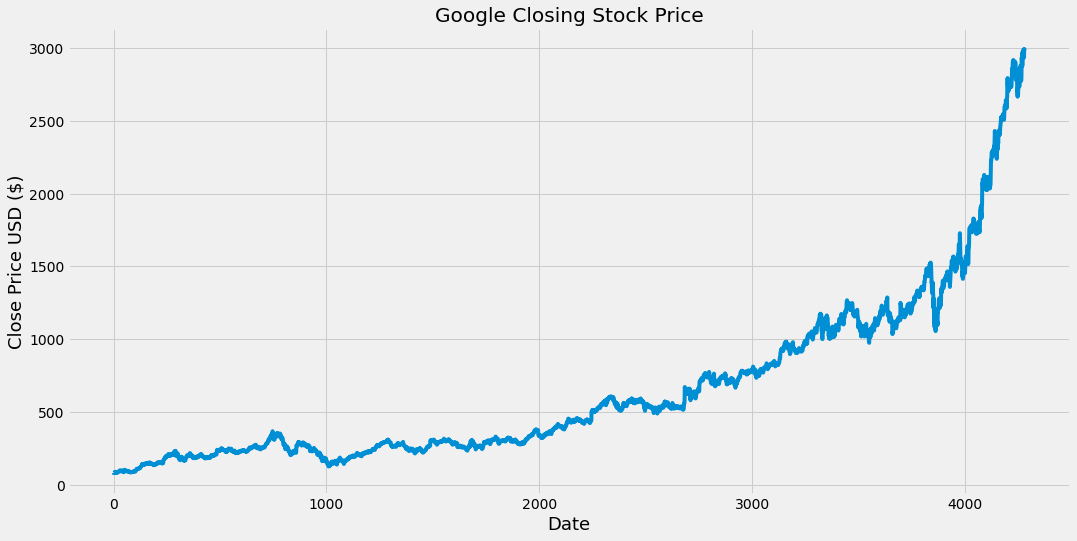

In [5]:
plt.style.use("fivethirtyeight")
plt.figure(figsize=(16,8))
plt.title("Google Closing Stock Price")
plt.plot(data["Close"])
plt.xlabel("Date", fontsize=18)
plt.ylabel("Close Price USD ($)", fontsize=18)
plt.show()

In [6]:
data = data[["Date","Close"]] 
data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2004-11-17,85.927917
1,2004-11-18,83.457184
2,2004-11-19,84.383713
3,2004-11-22,82.241737
4,2004-11-23,83.447220


In [7]:
from fbprophet import Prophet
m = Prophet(daily_seasonality=True)
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


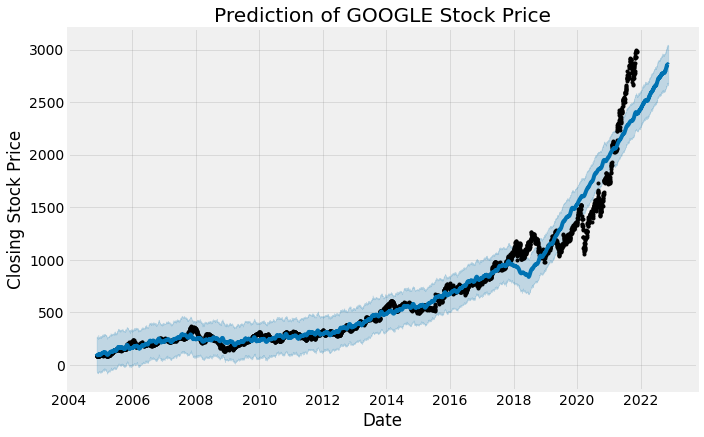

In [8]:
future = m.make_future_dataframe(periods=365)
predictions=m.predict(future)
m.plot(predictions)
plt.title("Prediction of GOOGLE Stock Price")
plt.xlabel("Date")
plt.ylabel("Closing Stock Price")
plt.show()

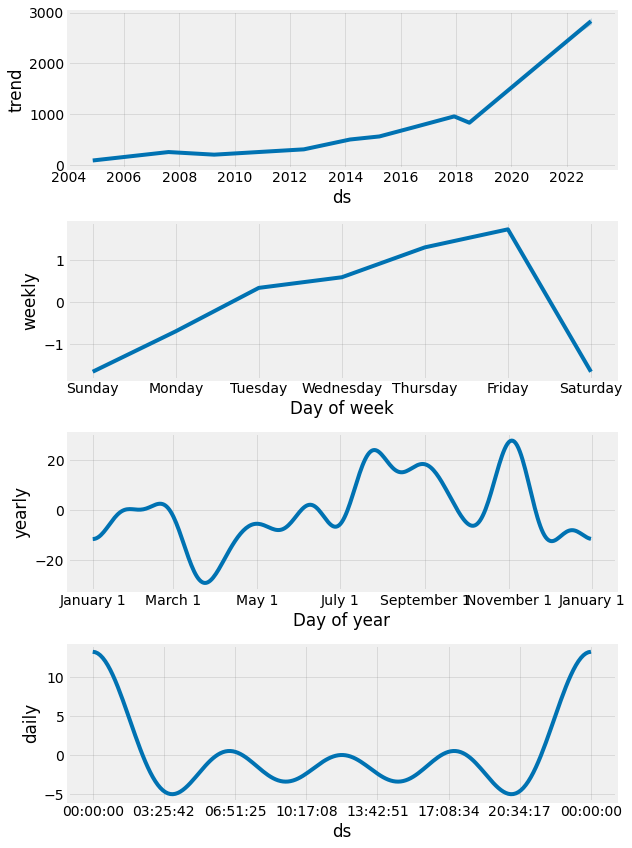

In [9]:
m.plot_components(predictions)
plt.show()